In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df_index=pd.read_csv("economic_index.csv")

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
## drop unnessesary columns
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [5]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

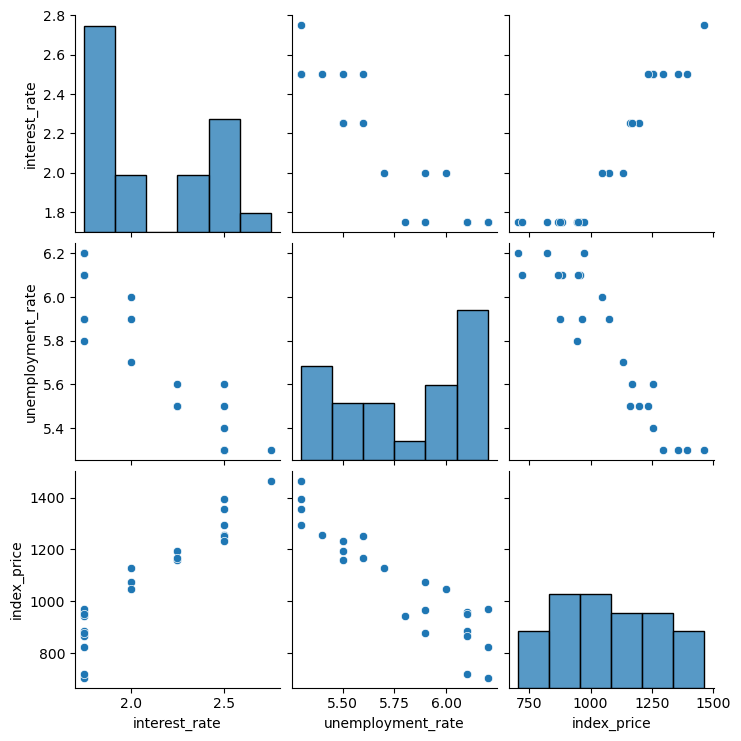

In [7]:
## Lets do some visualization
import seaborn as sns
sns.pairplot(df_index)
plt.show()

In [8]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


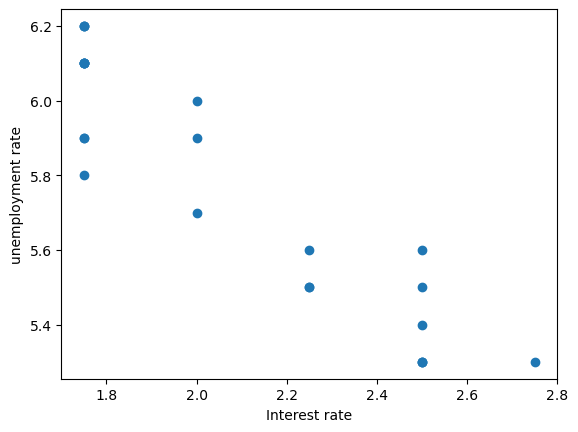

In [9]:
## Visualize the data point more closly
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'])
plt.xlabel("Interest rate")
plt.ylabel("unemployment rate")
plt.show()

In [10]:
##independent and dependent features
x=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [11]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [12]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [13]:
## train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [14]:
import seaborn as sns

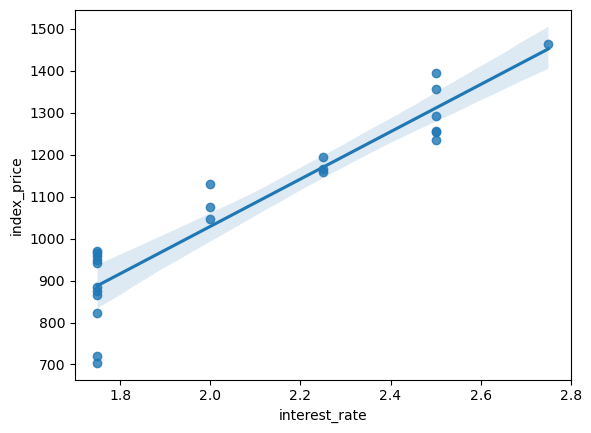

In [15]:
# Ensure column names and data types are correct
df_index['interest_rate'] = pd.to_numeric(df_index['interest_rate'], errors='coerce')
df_index['index_price'] = pd.to_numeric(df_index['index_price'], errors='coerce')

# Plot the regression line
sns.regplot(x='interest_rate', y='index_price', data=df_index)
plt.show()

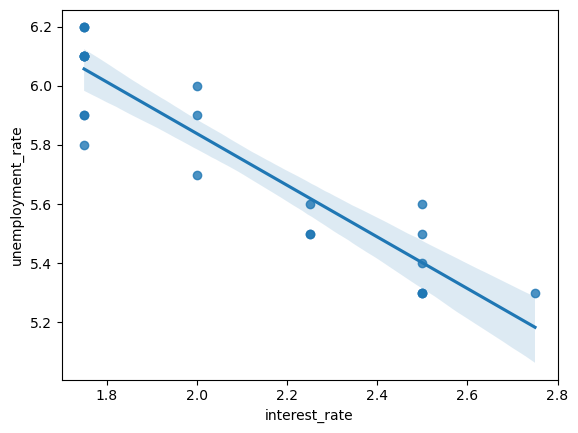

In [ ]:
# Ensure column names and data types are correct
df_index['interest_rate'] = pd.to_numeric(df_index['interest_rate'], errors='coerce')

df_index['index_price'] = pd.to_numeric(df_index['unemployment_rate'], errors='coerce')

# Plot the regression line
sns.regplot(x='interest_rate', y='unemployment_rate', data=df_index)
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [19]:
x_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [20]:
from sklearn.linear_model import LinearRegression 
regression=LinearRegression()

In [21]:
regression.fit(x_train,y_train)

LinearRegression()

In [22]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,x_train,y_train,scoring='neg_mean_absolute_error',
                                 cv=3)

In [23]:
np.mean(validation_score)

np.float64(-66.17276510903106)

In [24]:
### preditictiom
y_pred=regression.predict(x_test)


In [25]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [26]:
##performance metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_pred,y_test)
mae=mean_absolute_error(y_pred,y_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712579
59.935781523235526
76.11677139574812


In [27]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.8278978091457142


In [29]:
## display adjusted r-squasered value
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)


0.713163015242857

### Assumptions


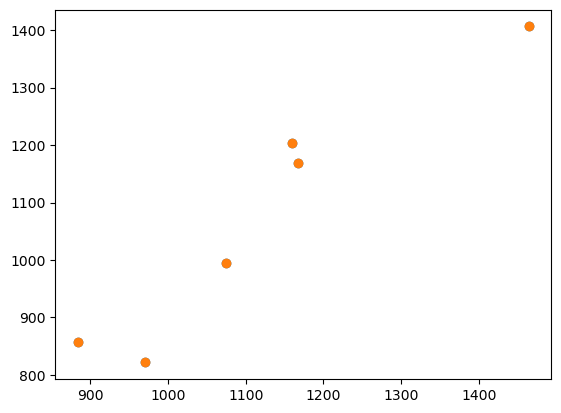

In [31]:
plt.scatter(y_test,y_pred)
plt.show()

In [32]:
residuals=y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


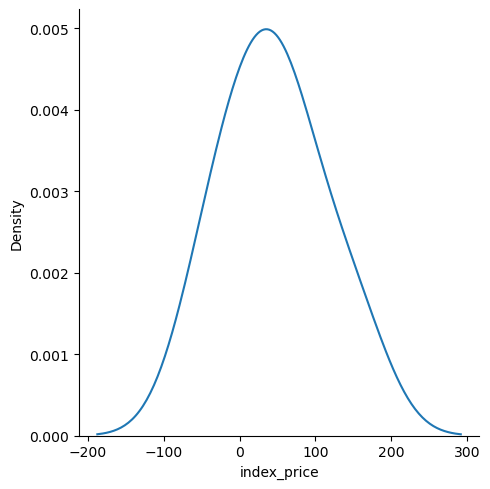

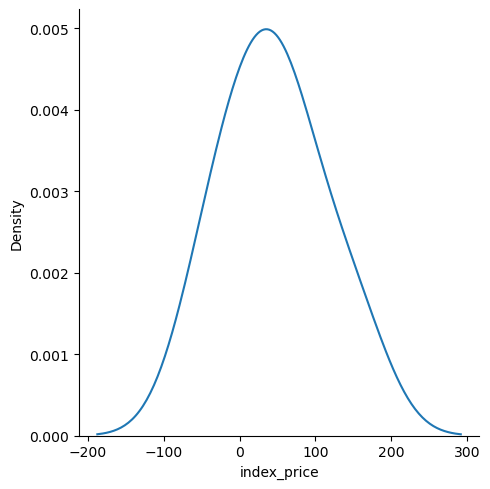

In [34]:
##plot this residuals
sns.displot(residuals,kind='kde')
plt.show()

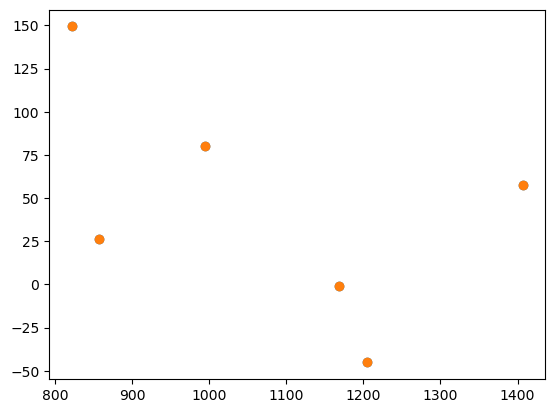

In [36]:
## Scatter plot with repect to residuals and prediction
plt.scatter(y_pred,residuals)
plt.show()

In [38]:
## OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train,x_train).fit()
prediction=model.predict(x_test)
print(prediction)

[ 150.78325954 -231.79392541  353.06855924 -195.73554836  -58.53452146
  114.72488249]


In [39]:
model.summary()

e:\anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 02 Aug 2025   Prob (F-statistic):                       0.754
Time:                        16:58:25   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
print(regression.coef_)

[  88.27275507 -116.25716066]
